In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

<IPython.core.display.Javascript object>


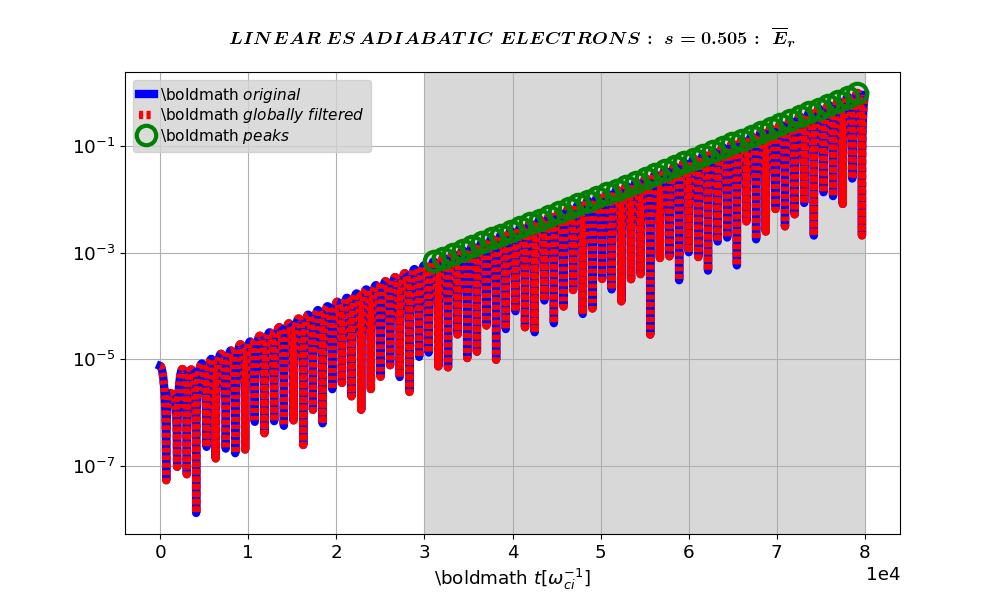

<IPython.core.display.Javascript object>


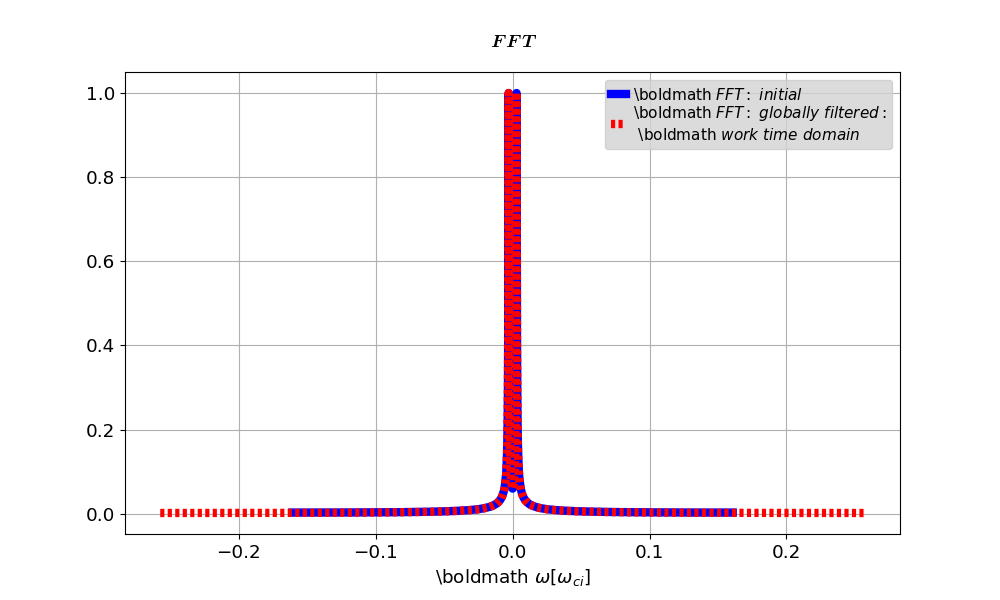

<IPython.core.display.Javascript object>


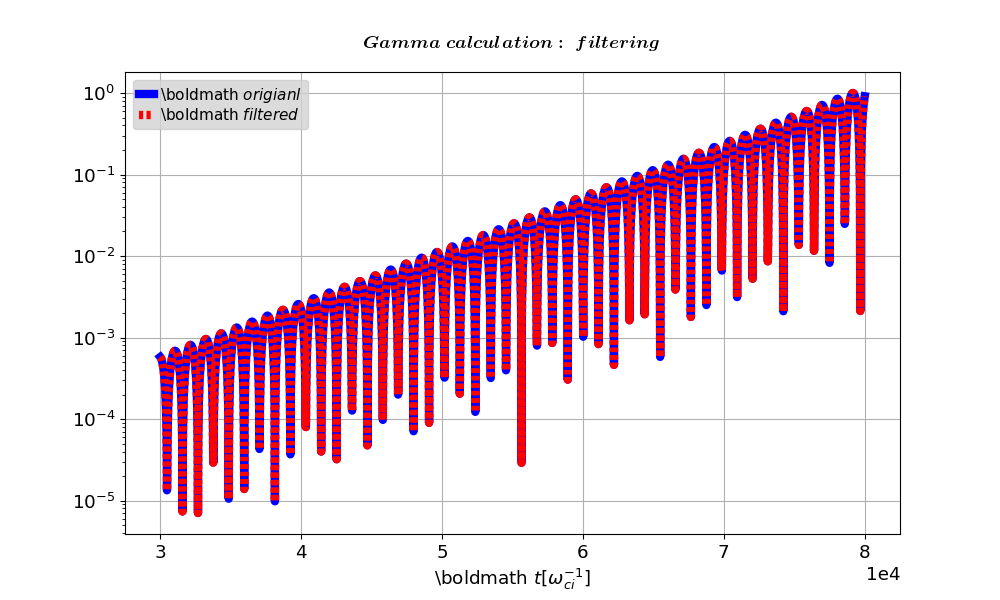

<IPython.core.display.Javascript object>


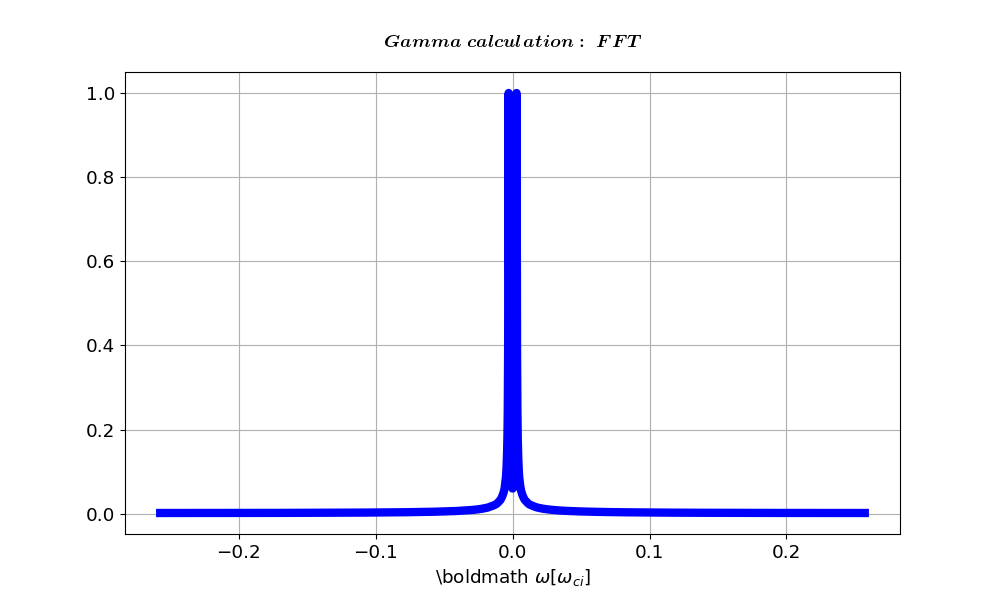

<IPython.core.display.Javascript object>


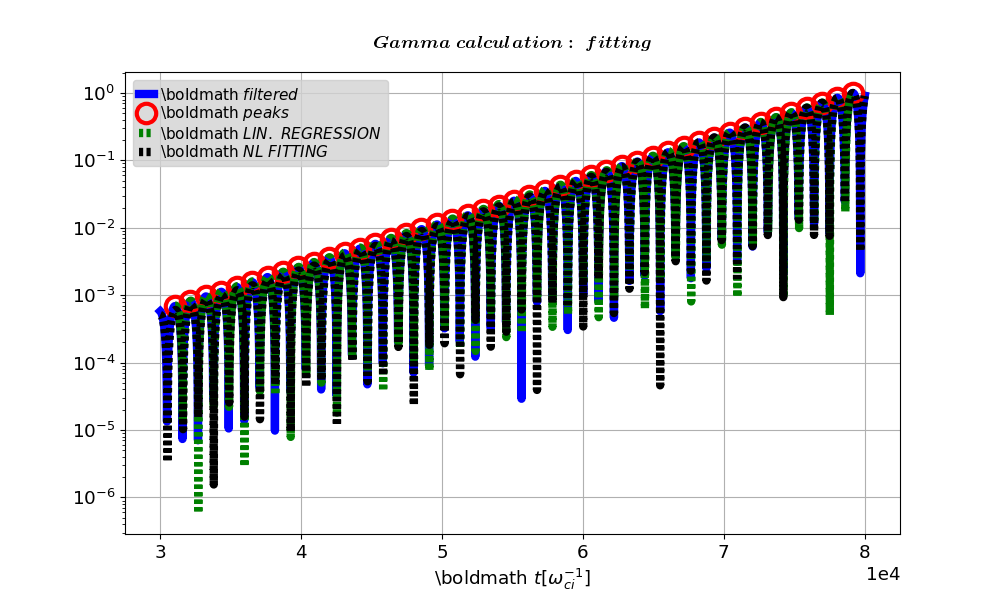

<IPython.core.display.Javascript object>


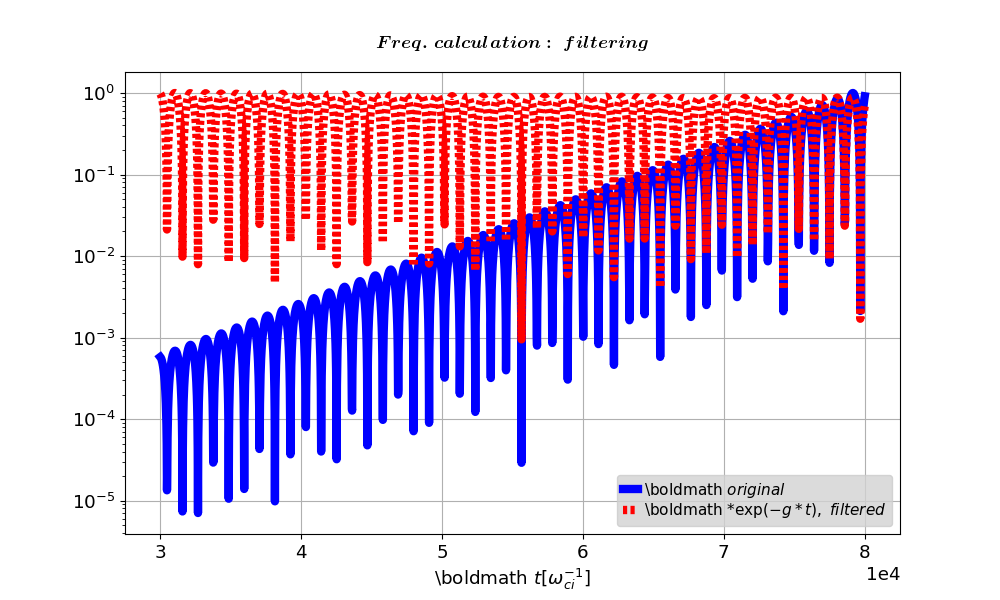

<IPython.core.display.Javascript object>


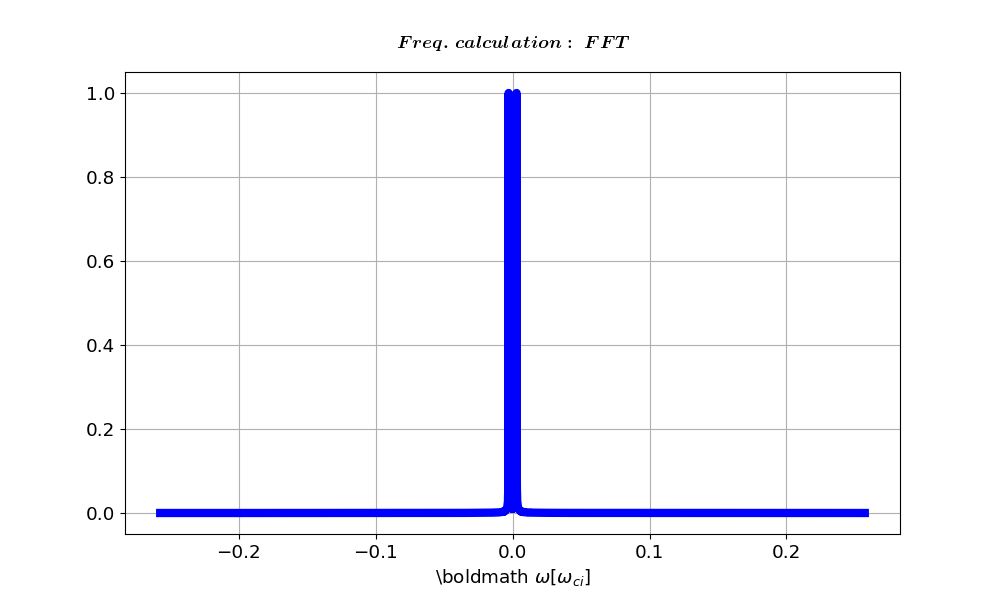

<IPython.core.display.Javascript object>


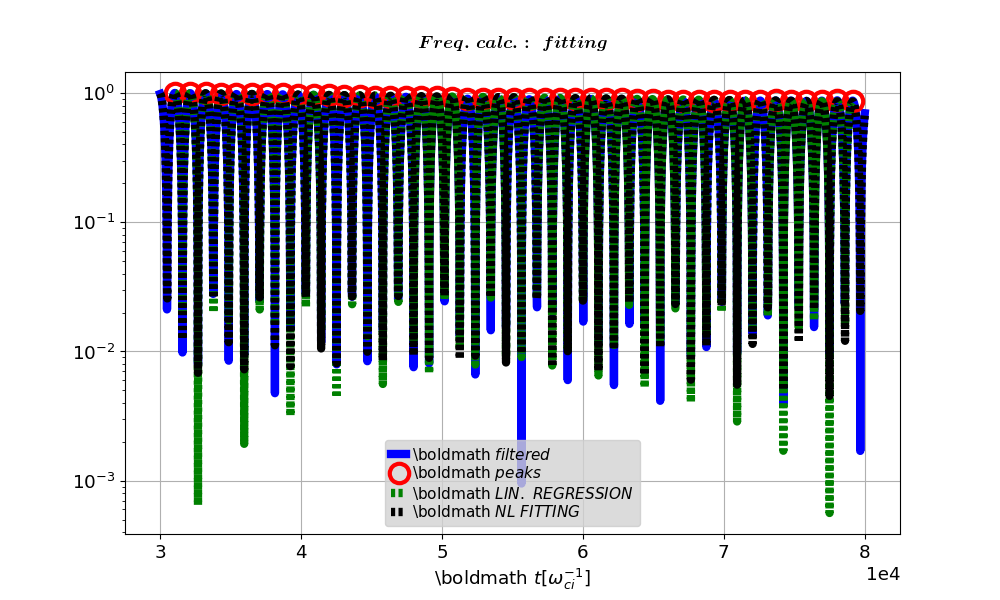

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w\ [kHz] = 4.819e+01
g\ [10^3\ s^{-1}] = 1.591e+01 +- 3.657e-02
- GAMMA: NL FITTING -
prel. w\ [kHz] = 4.823e+01 +- 1.045e-03
g\ [10^3\ s^{-1}] = 1.625e+01 +- 6.888e-03
- FREQUENCY: ESTIMATION -
w\ [kHz] = 4.819e+01
(g_real - g_num)\ [10^3\ s^{-1}] = -3.393e-01 +- 3.955e-02
- FREQUENCY: NL FITTING -
w\ [kHz] = 4.819e+01 +- 7.059e-04
(g_real - g_num)\ [10^3\ s^{-1}] = -3.358e-01 +- 4.489e-03
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


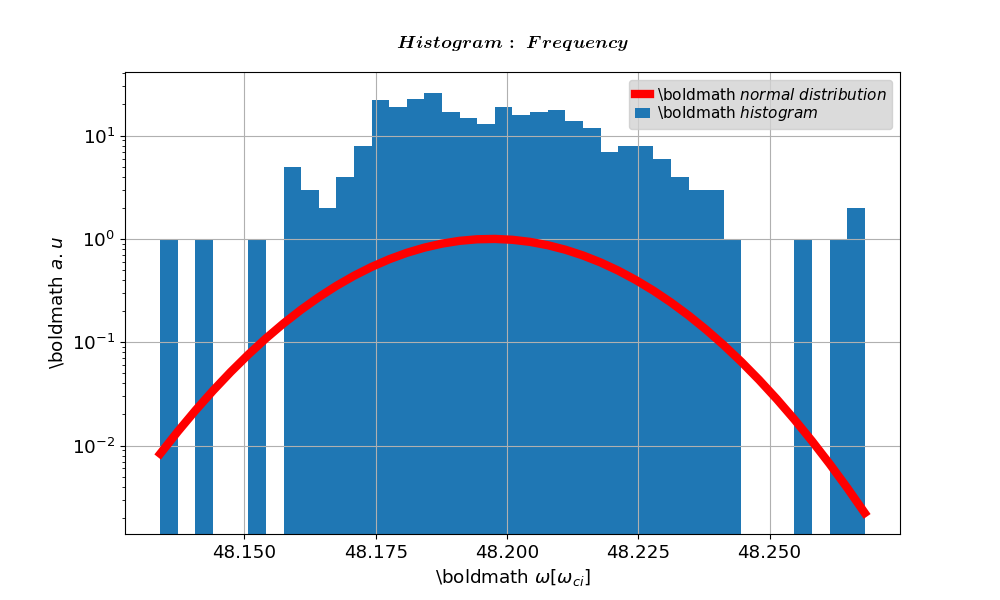

<IPython.core.display.Javascript object>


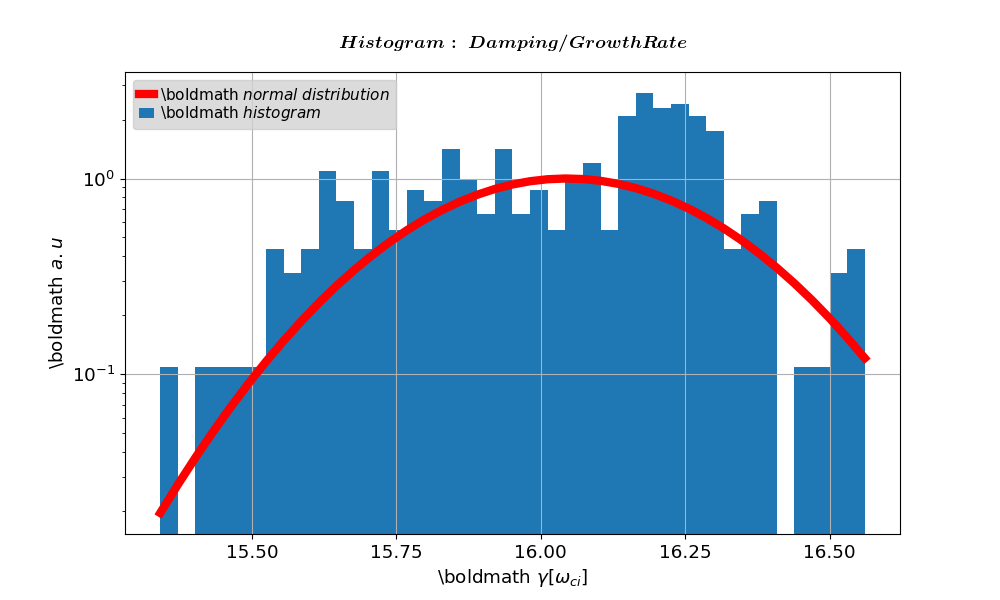

--- STATISTICS ---
number of frequency samples = 300
number of rate samples = 300
w\ [kHz] = 4.820e+01+-3.990e-02
g\ [10^3\ s^{-1}] = 1.604e+01+-4.921e-01


{'naive': {'w_est': 48.19288233355161,
  'g_est': 15.907332880243466,
  'w_adv': 48.18882961572689,
  'g_adv': 16.24622435292631},
 'stat': {'w': 48.19696453973948,
  'err_w': 0.039901130206692,
  'g': 16.044945305232947,
  'err_g': 0.49211093686226454}}

In [4]:
# ********************************************************************************************************
# *** Calculation of a wave frequency and growth/damping rate using Nonlinear fitting: STANDARD OUTPUT ***
# ********************************************************************************************************
reload()

dd_current, s1 = dict(b025_f001), 0.50
tmin, tmax = 3e4, 8.0e4
filt_global = None
filt_freq = None
min_n_peaks, threshold_w, threshold_g = 4, 0.1, 0.1
n_samples = 300

# signal
ch_signal = GLO.create_signals_dds(
    GLO.def_erbar_ts,
    [dd_current],
    operations = ['point-s'],
    domains = [s1],
)[0]

# For FreqGrowth calculation
oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'flag_two_stages': True,
    'sel_norm_wg': 'khz',
    # FILTERING
    'filt_global': filt_global, 
    'filt_freq': filt_freq,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
}

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff.update({
    'flag_norm': True,
    'flag_semilogy': True
})

# plotting:
oo = {
    'signal': ch_signal,
    'ff': ff,
}
common.calc_wg(oo, oo_wg)

<IPython.core.display.Javascript object>


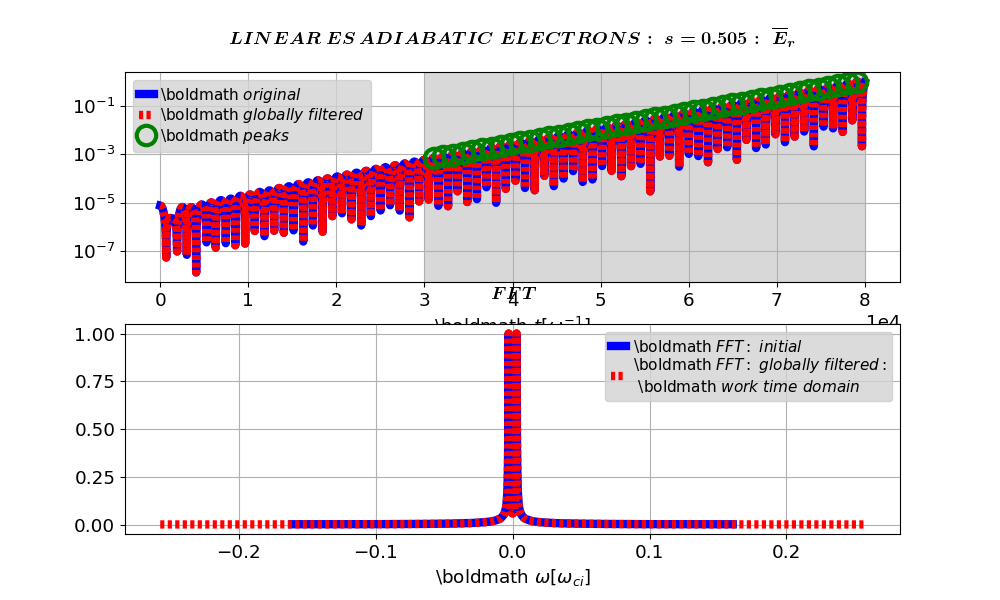

<IPython.core.display.Javascript object>


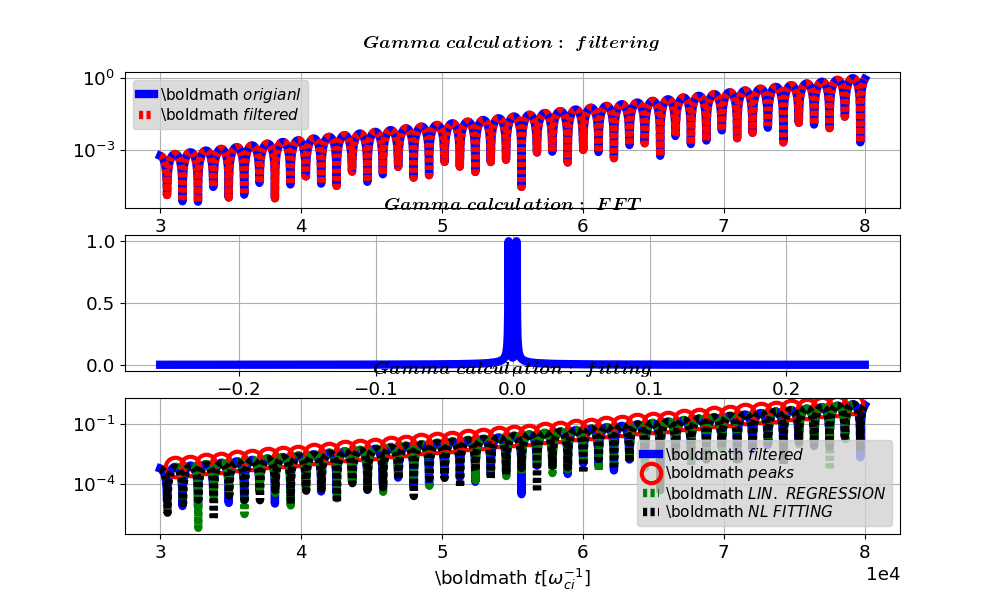

<IPython.core.display.Javascript object>


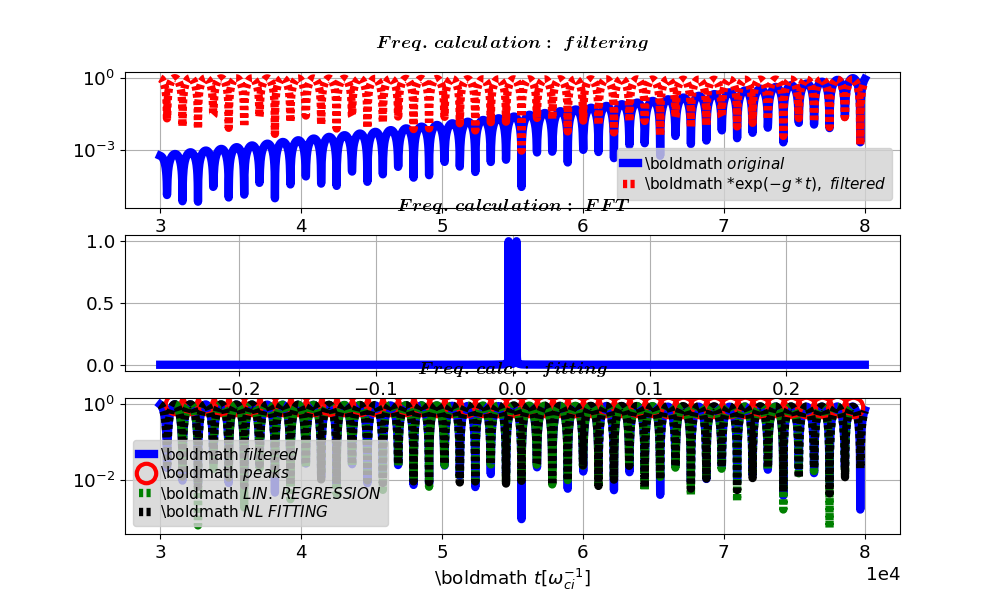

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w\ [kHz] = 4.819e+01
g\ [10^3\ s^{-1}] = 1.591e+01 +- 3.657e-02
- GAMMA: NL FITTING -
prel. w\ [kHz] = 4.823e+01 +- 1.045e-03
g\ [10^3\ s^{-1}] = 1.625e+01 +- 6.888e-03
- FREQUENCY: ESTIMATION -
w\ [kHz] = 4.819e+01
(g_real - g_num)\ [10^3\ s^{-1}] = -3.393e-01 +- 3.955e-02
- FREQUENCY: NL FITTING -
w\ [kHz] = 4.819e+01 +- 7.059e-04
(g_real - g_num)\ [10^3\ s^{-1}] = -3.358e-01 +- 4.489e-03
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


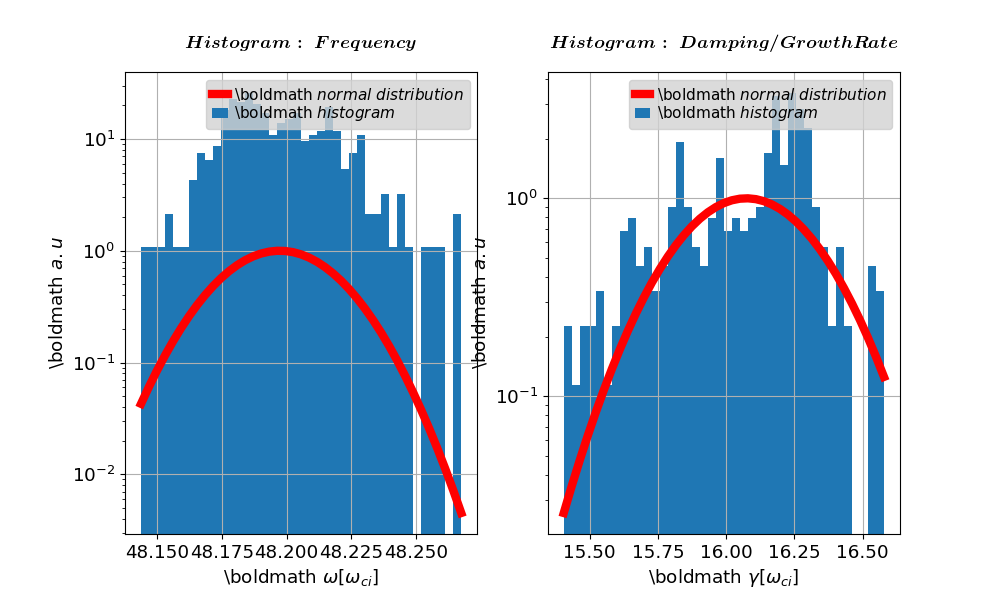

In [20]:
# ********************************************************************************************************
# *** Calculation of a wave frequency and growth/damping rate using Nonlinear fitting: STANDARD OUTPUT ***
# ********************************************************************************************************
reload()

dd_current, s1 = dict(b025_f001), 0.50
tmin, tmax = 3e4, 8.0e4
filt_global = None
filt_freq = None
min_n_peaks, threshold_w, threshold_g = 4, 0.1, 0.1
n_samples = 300

# signal
ch_signal = GLO.create_signals_dds(
    GLO.def_erbar_ts,
    [dd_current],
    operations = ['point-s'],
    domains = [s1],
)[0]

# For FreqGrowth calculation
oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'flag_two_stages': True,
    'sel_norm_wg': 'khz',
    # FILTERING
    'filt_global': filt_global, 
    'filt_freq': filt_freq,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
}

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff.update({
    'flag_norm': True,
    'flag_semilogy': True
})

# plotting:
oo = {
    'signal': ch_signal,
    'ff': ff,
    'flag_subplots': True,
}
common.calc_wg(oo, oo_wg)